# Day 78

#### Matplotlib Built-In modules Day 8

Welcome to the Data Analyzer and Plotter!
Data saved to 'data.csv'
Data Analysis Results:
Mean Value1: 50.93
Mean Value2: 0.47900000000000004
Max Value1: 100
Min Value2: 0.01


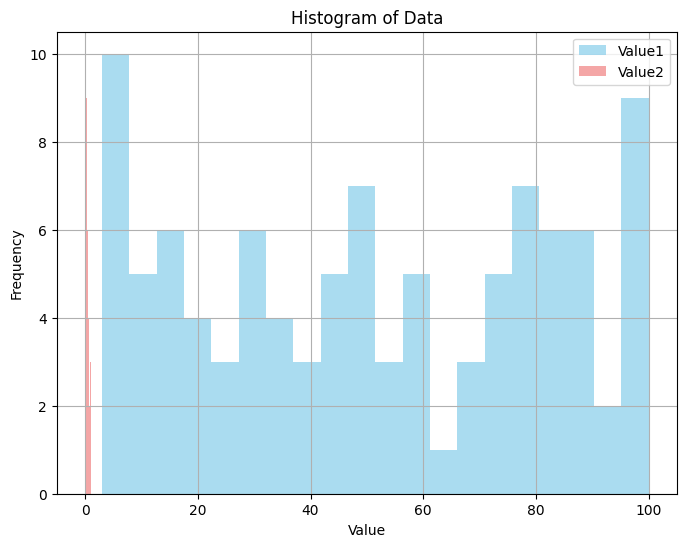

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class DataAnalyzer:
    def __init__(self, data_file):
        self.data_file = data_file

    def generate_data(self, num_rows):
        try:
            random.seed(42)  # Seed for reproducibility

            data = {
                'ID': [i + 1 for i in range(num_rows)],
                'Name': [''.join(random.choices('ABCDEFGHIJKLMNOPQRSTUVWXYZ', k=5)) for _ in range(num_rows)],
                'Value1': [random.randint(1, 100) for _ in range(num_rows)],
                'Value2': [round(random.uniform(0, 1), 2) for _ in range(num_rows)],
            }

            return pd.DataFrame(data)
        except Exception as e:
            print(f"Error generating data: {e}")
            return None

    def save_to_csv(self, data):
        if data is None:
            return

        try:
            data.to_csv(self.data_file, index=False)
            print(f"Data saved to '{self.data_file}'")
        except Exception as e:
            print(f"Error saving data to CSV: {e}")

    def load_data(self):
        try:
            return pd.read_csv(self.data_file)
        except FileNotFoundError:
            print(f"File '{self.data_file}' not found.")
            return None
        except pd.errors.EmptyDataError:
            print(f"File '{self.data_file}' is empty.")
            return None
        except pd.errors.ParserError:
            print(f"Error parsing '{self.data_file}'. Check the file format.")
            return None

    def analyze_data(self, data):
        if data is None:
            return None

        try:
            # Calculate basic statistics using NumPy
            mean_value1 = np.mean(data['Value1'])
            mean_value2 = np.mean(data['Value2'])
            max_value1 = np.max(data['Value1'])
            min_value2 = np.min(data['Value2'])
            return mean_value1, mean_value2, max_value1, min_value2
        except KeyError:
            print("Column 'Value1' or 'Value2' not found in the data.")
            return None

    def plot_data(self, data):
        if data is None:
            return

        try:
            plt.figure(figsize=(8, 6))  # Set figure size

            plt.hist(data['Value1'], bins=20, color='skyblue', alpha=0.7, label='Value1')
            plt.hist(data['Value2'], bins=20, color='lightcoral', alpha=0.7, label='Value2')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.title('Histogram of Data')
            plt.legend()
            plt.grid(True)
            plt.show()
        except ValueError:
            print("Error while plotting data. Ensure 'Value1' and 'Value2' columns contain numeric values.")

def main():
    print("Welcome to the Data Analyzer and Plotter!")

    data_file = "data.csv"
    num_rows = 100  # Number of rows of data to generate

    data_analyzer = DataAnalyzer(data_file)

    generated_data = data_analyzer.generate_data(num_rows)
    data_analyzer.save_to_csv(generated_data)

    data = data_analyzer.load_data()
    if data is not None:
        analysis_result = data_analyzer.analyze_data(data)
        if analysis_result is not None:
            mean_value1, mean_value2, max_value1, min_value2 = analysis_result
            print("Data Analysis Results:")
            print(f"Mean Value1: {mean_value1}")
            print(f"Mean Value2: {mean_value2}")
            print(f"Max Value1: {max_value1}")
            print(f"Min Value2: {min_value2}")

        data_analyzer.plot_data(data)

if __name__ == "__main__":
    main()
